In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data
#1 -age
#2- sex - 1 for male 0 for female
#3 - chest pain 4 levels from 0 to 3
#4 - resting blood pressure
#5 - serum cholestoral in mg/dl
#6 - fasting blood sugar > 120 mg/dl if yes then 1 otherwise 0
#7 - resting electrocardiographic results (values 0,1,2)
#8 - maximum heart rate achieved
#9 - exercise induced angina 1 for yes 0 no
#10 - oldpeak = ST depression induced by exercise relative to rest
#11 - the slope of the peak exercise ST segment
#12 - number of major vessels (0-3) colored by flourosopy
#13 - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Cleaning 

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values

# EDA

In [7]:
data.shape

(1025, 14)

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


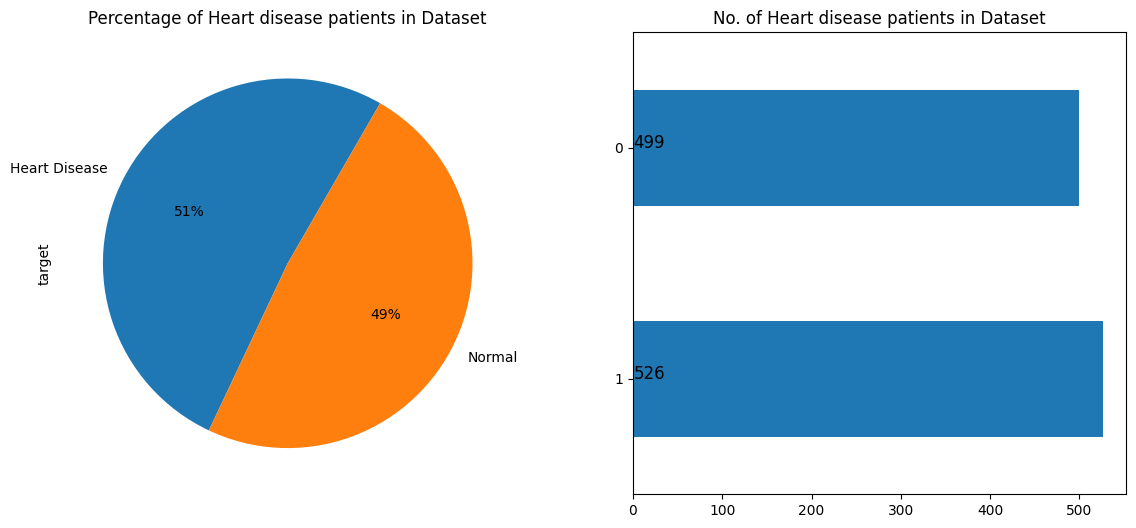

In [9]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = data['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = data["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(data["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10748\3784741401.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(data['age'], rug=True)


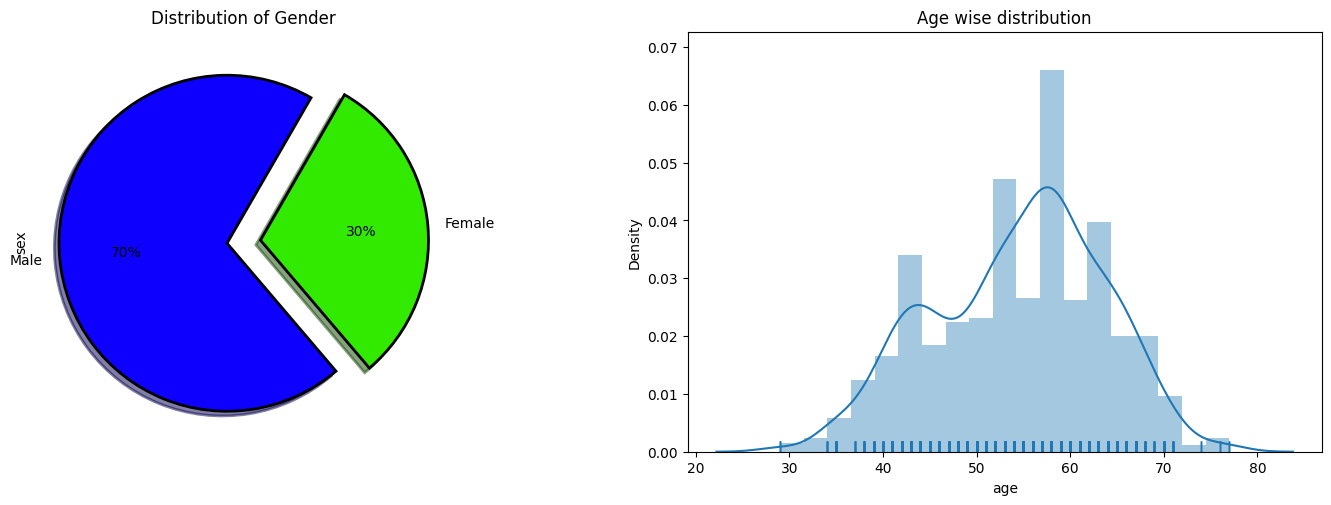

In [10]:
plt.figure(figsize=(18,12))
plt.subplot(221)
data["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(data['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10748\2954388406.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attr_0['age'])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10748\2954388406.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attr_1['age'])


Text(0.5, 1.0, 'AGE DISTRIBUTION OF HEART DISEASE PATIENTS')

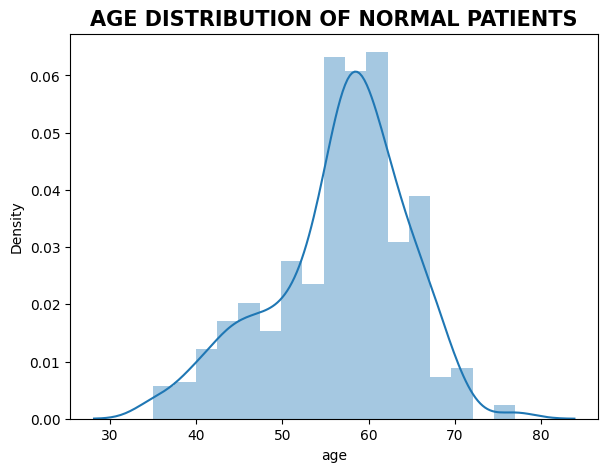

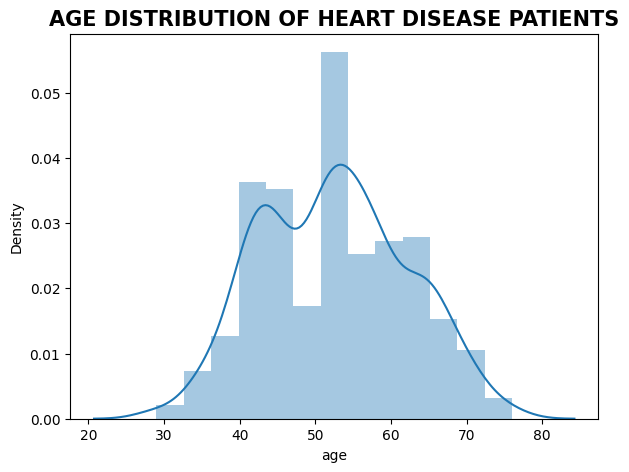

In [11]:
# creating separate df for normal and heart patients

attr_1=data[data['target']==1]

attr_0=data[data['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')



#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')



<Axes: xlabel='trestbps', ylabel='chol'>

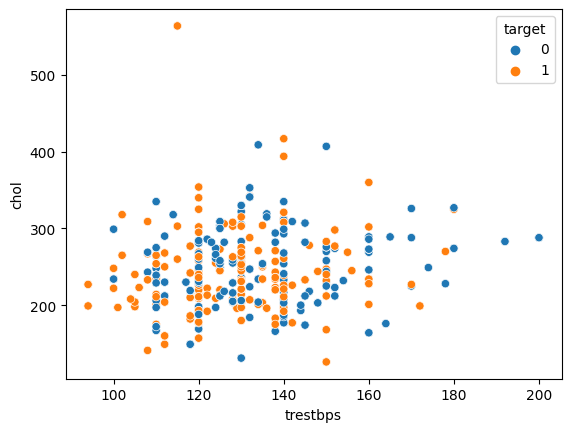

In [12]:
sns.scatterplot(x = 'trestbps', y = 'chol', hue = 'target', data = data)

<Axes: xlabel='trestbps', ylabel='age'>

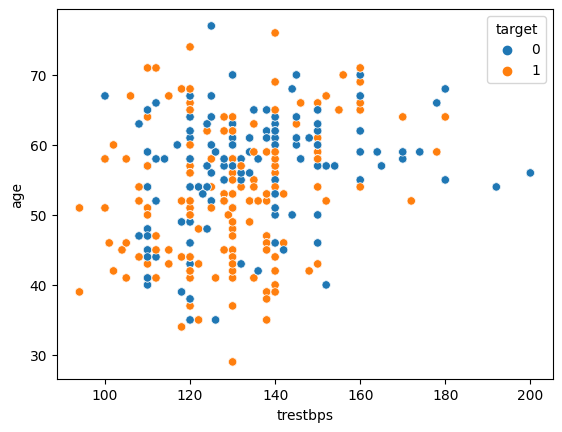

In [13]:
 sns.scatterplot(x = 'trestbps', y = 'age', hue = 'target', data = data)

# Removing of Outliners

In [14]:
data_numeric = data[['age','trestbps','chol','thalach']]
data_numeric

,age,trestbps,chol,thalach
0,52,125,212,168
1,53,140,203,155
2,70,145,174,125
3,61,148,203,161
4,62,138,294,106
...,...,...,...,...
1020,59,140,221,164
1021,60,125,258,141
1022,47,110,275,118
1023,50,110,254,159


In [15]:
from scipy import stats
z_score = np.abs(stats.zscore(data_numeric))
z_score

,age,trestbps,chol,thalach
0,0.268437,0.377636,0.659332,0.821321
1,0.158157,0.479107,0.833861,0.255968
2,1.716595,0.764688,1.396233,1.048692
3,0.724079,0.936037,0.833861,0.516900
4,0.834359,0.364875,0.930822,1.874977
...,...,...,...,...
1020,0.503520,0.479107,0.484803,0.647366
1021,0.613800,0.377636,0.232705,0.352873
1022,0.819834,1.234378,0.562371,1.353113
1023,0.488996,1.234378,0.155137,0.429923


In [16]:
#threshold
print(np.where(z_score>3))

(array([123, 151, 158, 175, 179, 192, 246, 267, 294, 296, 326, 378, 450,
       464, 481, 508, 559, 641, 665, 685, 688, 889, 958, 996], dtype=int64), array([2, 1, 2, 1, 2, 2, 1, 3, 1, 3, 1, 3, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2,
       2, 2], dtype=int64))


There first array is row number and second array contains list of column numbers

In [17]:
data = data[(z_score<3).all(axis=1)]
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [18]:
#Separting data
X = data.drop(['target'], axis=1)
Y = data['target']

# Checking Correaltions

<Axes: title={'center': 'Correlation'}>

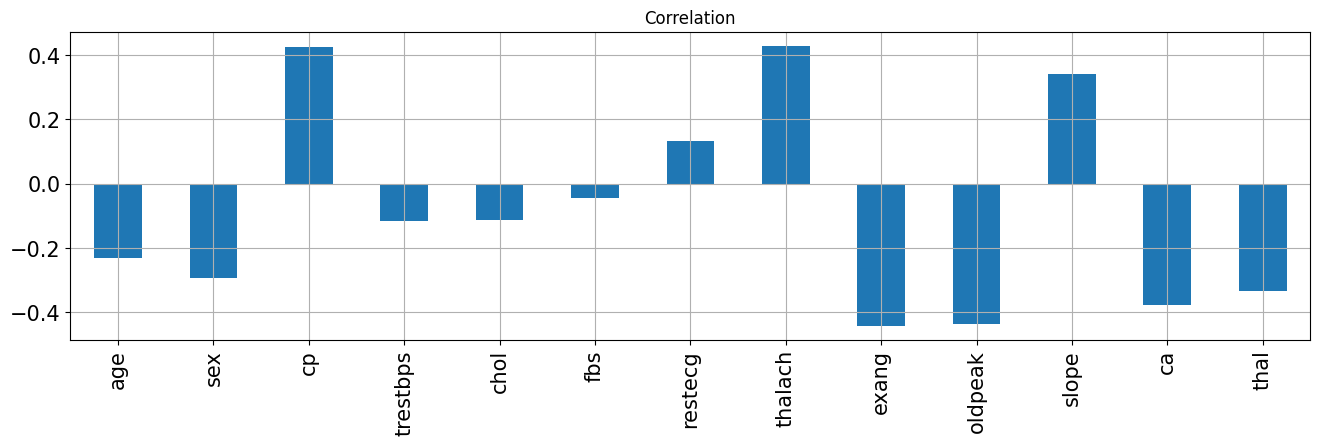

In [19]:
X.corrwith(Y).plot.bar(
        figsize = (16, 4), title = "Correlation", fontsize = 15,
        rot = 90, grid = True)

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train , x_test , y_train , y_test = train_test_split (X,Y , shuffle =True ,train_size =0.8 , stratify = Y , random_state=1)

In [22]:
x_train.shape

(800, 13)

In [23]:
y_train.shape

(800,)

In [24]:
x_test.shape

(201, 13)

In [25]:
y_test.shape

(201,)

#  Feature Scaling 

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train[['age','trestbps','chol','thalach']] = scaler.fit_transform(x_train[['age','trestbps','chol','thalach']])

In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
209,0.687500,1,1,0.302326,0.578358,0,0,0.131579,0,1.4,1,1,3
87,0.625000,0,0,0.930233,0.458955,0,1,0.482456,1,0.0,1,0,2
768,0.354167,1,1,0.081395,0.264925,1,1,0.596491,0,0.0,2,0,3
839,0.458333,1,0,0.534884,0.503731,0,0,0.859649,1,0.0,2,0,2
986,0.541667,0,0,1.000000,0.750000,0,2,0.254386,1,3.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.625000,1,0,0.534884,0.190299,0,1,0.649123,1,0.0,2,1,3
774,0.395833,0,2,0.418605,0.555970,0,1,0.447368,0,0.2,2,0,2
261,0.520833,1,2,0.651163,0.395522,0,0,0.675439,0,1.6,2,0,3
222,0.729167,1,3,0.186047,0.317164,0,0,0.491228,1,1.8,1,0,2


In [28]:
x_test[['age','trestbps','chol','thalach']] = scaler.transform(x_test[['age','trestbps','chol','thalach']])
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
85,0.312500,1,1,0.302326,0.350746,0,1,0.719298,0,0.0,2,0,2
436,0.625000,0,0,0.930233,0.458955,0,1,0.482456,1,0.0,1,0,2
145,0.229167,1,0,0.186047,0.152985,0,0,0.228070,1,2.0,1,0,3
63,0.625000,1,2,0.651163,0.320896,1,1,0.605263,0,1.6,2,0,2
55,0.541667,1,0,0.534884,0.339552,0,1,0.201754,1,5.6,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0.729167,1,0,0.593023,0.320896,0,0,0.385965,0,2.0,1,2,1
734,0.479167,1,0,0.395349,0.291045,1,1,0.596491,1,1.0,1,0,0
967,0.645833,0,2,0.302326,0.194030,1,1,0.070175,0,0.0,2,0,2
75,0.375000,1,2,0.511628,0.488806,0,0,0.596491,0,0.0,2,0,2


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.svm          import SVC
from sklearn.naive_bayes  import GaussianNB
from sklearn.neighbors    import KNeighborsClassifier #k=2
from sklearn.metrics      import accuracy_score , classification_report , ConfusionMatrixDisplay,precision_score , recall_score,f1_score


In [30]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
# function initializing baseline machine learning models
def GetBasedModel():
    basedModels = []
    basedModels.append(('Logistic Regression'   , LogisticRegression()))
    basedModels.append(('KNN2'  , KNeighborsClassifier(2)))
    basedModels.append(('KNN3'  , KNeighborsClassifier(3)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('Decision Tree' , DecisionTreeClassifier()))
    basedModels.append(('Naive_bayes'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC()))
    basedModels.append(('Random Forest'   , RandomForestClassifier()))
    
    return basedModels

# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(x_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle = True)
        cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg
    

In [31]:
models = GetBasedModel()
names , results = BasedLine2(x_train,y_train ,models)

Logistic Regression: 0.835000 (0.042131)
KNN2: 0.955000 (0.029155)
KNN3: 0.936250 (0.031844)
KNN5: 0.843750 (0.042665)
KNN7: 0.852500 (0.035267)
Decision Tree: 0.990000 (0.014577)
Naive_bayes: 0.830000 (0.040000)
SVM Linear: 0.885000 (0.039449)
Random Forest: 0.990000 (0.013463)


# Model Building 

# Logistic Model

In [32]:
logi = LogisticRegression()
logi.fit(x_train,y_train)
x_test_pred = logi.predict(x_test)

# KNN2

In [33]:
knn_2 =  KNeighborsClassifier(2)
knn_2.fit(x_train,y_train)
knn_2_pred = knn_2.predict(x_test)

# KNN3

In [34]:
knn_3 =  KNeighborsClassifier(3)
knn_3.fit(x_train,y_train)
knn_3_pred = knn_3.predict(x_test)

# KNN5

In [35]:
knn_5 =  KNeighborsClassifier(5)
knn_5.fit(x_train,y_train)
knn_5_pred = knn_5.predict(x_test)

# KNN7

In [36]:
knn_7 =  KNeighborsClassifier(7)
knn_7.fit(x_train,y_train)
knn_7_pred = knn_7.predict(x_test)

# Decision Tree

In [37]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
dec_tree_pred = dec_tree.predict(x_test)

# Naive Bayes

In [38]:
nb =  GaussianNB()
nb.fit(x_train,y_train)
nb_pred = nb.predict(x_test)

# Support vector machines

In [39]:
svm =  SVC()
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)

# Random forest

In [40]:
random_for  = RandomForestClassifier()
random_for.fit(x_train,y_train)
random_for_pred = random_for.predict(x_test)

# Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Log_Loss,mathew_corrcoef
0,Decision Tree,0.985075,1.0,0.971154,1.0,0.985366,0.537965,0.970577


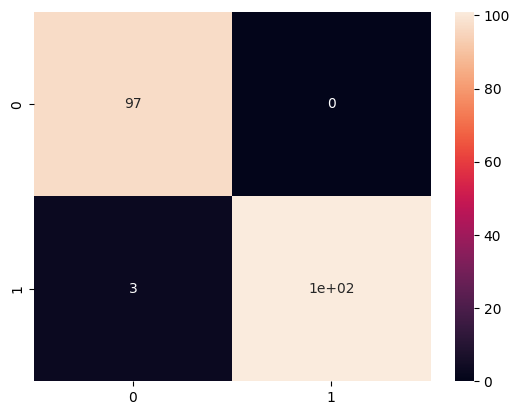

In [41]:
from sklearn.metrics import log_loss,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
CM=confusion_matrix(y_test,dec_tree_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, dec_tree_pred)
acc= accuracy_score(y_test, dec_tree_pred)
prec = precision_score(y_test,dec_tree_pred)
rec = recall_score(y_test, dec_tree_pred)
f1 = f1_score(y_test, dec_tree_pred)

mathew = matthews_corrcoef(y_test, dec_tree_pred)
model_results =pd.DataFrame([['Decision Tree',acc, prec,rec,specificity, f1, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','Log_Loss','mathew_corrcoef'])

model_results

In [42]:
data = {        'KNN(2)': knn_2_pred, 
                'Decision Tree': dec_tree_pred, 
                'KNN(3)': knn_3_pred, 
                'KNN(5)': knn_5_pred,
                'KNN(7)': knn_7_pred, 
                'Logistic Regression': x_test_pred, 
                'Naive Bayes': nb_pred , 
                'Support vector machines' : svm_pred,
                'Random Forest' : random_for_pred }
models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    mathew = matthews_corrcoef(y_test, models[column])
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','Log_Loss','mathew_corrcoef'])
    model_results = model_results.append(results, ignore_index = True)

model_results

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10748\1625010754.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10748\1625010754.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10748\1625010754.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append(results, ignore_index = True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10748\1625010754.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Log_Loss,mathew_corrcoef
0,Decision Tree,0.985075,1.000000,0.971154,1.000000,0.985366,5.379650e-01,0.970577
1,KNN(2),0.980100,1.000000,0.961538,1.000000,0.980392,7.172866e-01,0.960967
2,Decision Tree,0.985075,1.000000,0.971154,1.000000,0.985366,5.379650e-01,0.970577
3,KNN(3),0.955224,0.952381,0.961538,0.948454,0.956938,1.613895e+00,0.910353
4,KNN(5),0.880597,0.884615,0.884615,0.876289,0.884615,4.303720e+00,0.760904
5,KNN(7),0.860697,0.845455,0.894231,0.824742,0.869159,5.021006e+00,0.721769
6,Logistic Regression,0.845771,0.796748,0.942308,0.742268,0.863436,5.558971e+00,0.701979
7,Naive Bayes,0.791045,0.776786,0.836538,0.742268,0.805556,7.531510e+00,0.582280
8,Support vector machines,0.880597,0.838983,0.951923,0.804124,0.891892,4.303720e+00,0.767311
9,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,2.220446e-16,1.000000


In [43]:
import pickle
pickle.dump(dec_tree,open('model.pkl','wb'))